**Load data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/My Drive/airline customer dataset.csv'


In [3]:
import pandas as pd

# Specify the file path
file_path = '/content/drive/My Drive/airline customer dataset.csv'

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to confirm it's loaded
df.head()
print(df.shape)

(103904, 25)


In [4]:
print(df.head(5))

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [5]:
list(df.columns)

['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

**Data cleaning & Data processing**

In [6]:
# Check for missing values in the dataset
df.isnull().sum()


,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [7]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Check the result to see if the rows were successfully dropped
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [8]:
# Check data types
df.dtypes

,0
Unnamed: 0,int64
id,int64
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64


In [9]:
print(df['Gender'].unique())
print(df['Customer Type'].unique())
print(df['Type of Travel'].unique())
print(df['Class'].unique())
print(df['satisfaction'].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
['neutral or dissatisfied' 'satisfied']


In [10]:
print(df['Age'].unique())
print(df['Flight Distance'].unique())
print(df['Departure/Arrival time convenient'].unique())
print(df['Ease of Online booking'].unique())
print(df['Gate location'].unique())
print(df['Online boarding'].unique())
print(df['Seat comfort'].unique())
print(df['Inflight entertainment'].unique())
print(df['On-board service'].unique())
print(df['Leg room service'].unique())
print(df['Checkin service'].unique())
print(df['Inflight service'].unique())
print(df['Cleanliness'].unique())

[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
[ 460  235 1142 ...  974 1479  400]
[4 2 5 3 1 0]
[3 2 5 4 1 0]
[1 3 2 5 4 0]
[3 5 2 1 4 0]
[5 1 2 3 4 0]
[5 1 2 3 4 0]
[4 1 2 3 5 0]
[3 5 4 2 1 0]
[4 1 3 5 2 0]
[5 4 3 1 2 0]
[5 1 2 3 4 0]


In [11]:
print(df['Baggage handling'].unique())

[4 3 5 1 2]


In [12]:
print(df['Departure Delay in Minutes'].unique())
print(df['Arrival Delay in Minutes'].unique())

[  25    1    0   11    9    4   28   43   49    7   17   52   54   27
   18   19    3  109   23    8   14   10   51   39   13   30   64   20
   45   44   31   81   35   67   22   40   91   21   15   29  105   12
  162   24  141    6   34    2   97   16   99   37   66   53   36  209
   60  149   26    5   59   62  113   38   83  176   46   73  199   56
   93   70   80   96   57   95   74  172   63  175  143   48   47  101
  118   76  220   33   55  232  170  173  124  112   94  243  128   92
  270   90  110   50  144   71  315  158   88   65  111   32  156   41
  154  150  228   72  137  126  161   42  174  103  313  136  160  412
   69  185  114  135  142  147   85  235  125  391   84  138  102  196
  140   77  187  131   82  100   86  165   87  129  204  435  166  177
  123  139  116  108  167  285   61  117  106  190  168  211   89  324
   75  202  290  189  203  120  157  119   68  299  292   78  258  104
  121   58  222  317  320  200  134  248   79  240  169   98  249  145
  238 

In [13]:
# convert object type into numeric value
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel': 1, 'Business travel': 0})
df['Class'] = df['Class'].map({'Eco Plus': 0, 'Business': 1, 'Eco': 2})
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [14]:
# Check data types again
df.dtypes

,0
Unnamed: 0,int64
id,int64
Gender,int64
Customer Type,int64
Age,int64
Type of Travel,int64
Class,int64
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64


In [15]:
df.isnull().sum()


,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


**Exploratory data analysis(EDA)**

In [16]:
# Data Overview
# View the first few rows of the dataset to understand the structure
df.head()

# Get basic information about the dataset (e.g., number of rows, columns, data types)
df.info()

# Check the number of unique values in each column
df.nunique()



<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  int64  
 3   Customer Type                      103594 non-null  int64  
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  int64  
 6   Class                              103594 non-null  int64  
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      103594 no

,0
Unnamed: 0,103594
id,103594
Gender,2
Customer Type,2
Age,75
Type of Travel,2
Class,3
Flight Distance,3802
Inflight wifi service,6
Departure/Arrival time convenient,6


In [17]:
# Descriptive Statistics
# Summary statistics for numeric columns (mean, median, min, max, etc.)
df.describe()

# Summary statistics for categorical columns (counts, unique values)
df[['Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']].describe()


,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.817248,39.380466,0.310143,1.377676,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,...,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.433394
std,0.386465,15.113125,0.462554,0.615807,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,...,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,0.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,40.000000,0.000000,1.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


satisfaction
0    58697
1    44897
Name: count, dtype: int64


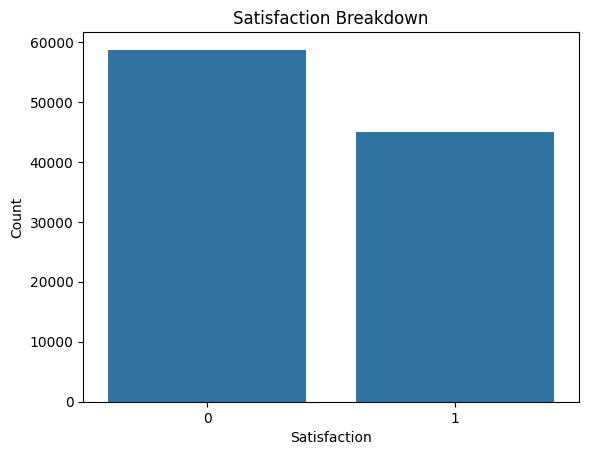

In [18]:
# Satisfaction Breakdown
# Count the number of occurrences of each satisfaction level
satisfaction_counts = df['satisfaction'].value_counts()
print(satisfaction_counts)

# Plot the satisfaction breakdown
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='satisfaction', data=df)
plt.title('Satisfaction Breakdown')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()


Customer Type
1    84662
0    18932
Name: count, dtype: int64


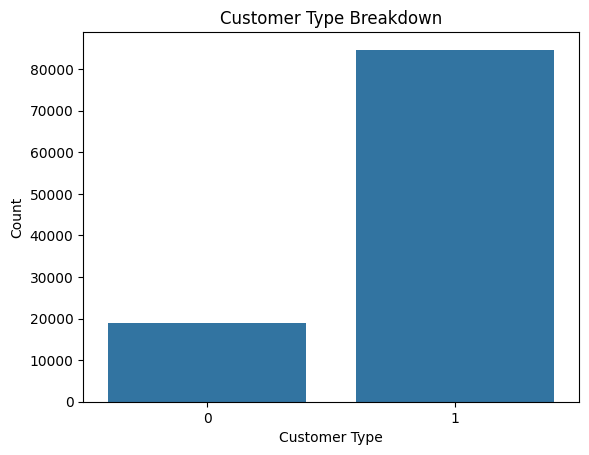

In [19]:
# Loyalty Breakdown
# Count the number of occurrences of each loyalty level
Customer_Type_counts = df['Customer Type'].value_counts()
print(Customer_Type_counts)

# Plot the satisfaction breakdown
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Customer Type', data=df)
plt.title('Customer Type Breakdown')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


Gender
1    52576
0    51018
Name: count, dtype: int64


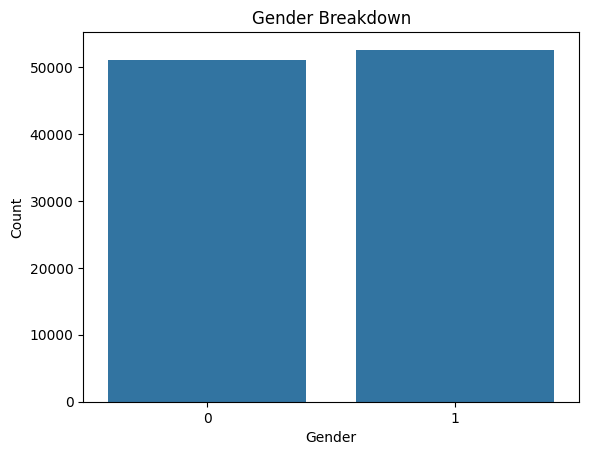

In [20]:
#Gender Breakdown
# Count the number of occurrences of each loyalty level
Gender_counts = df['Gender'].value_counts()
print(Gender_counts)

# Plot the satisfaction breakdown
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', data=df)
plt.title('Gender Breakdown')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Type of Travel
0    71465
1    32129
Name: count, dtype: int64


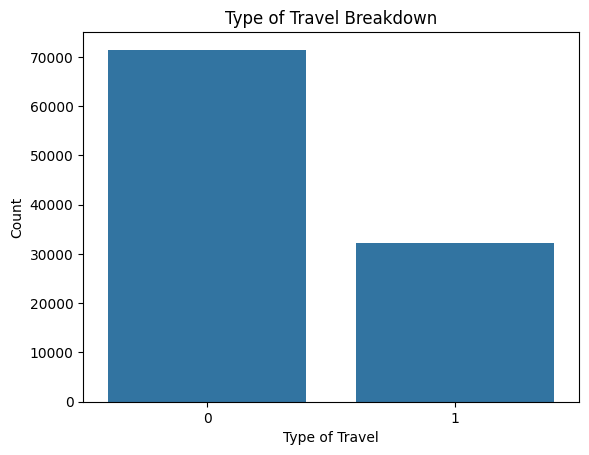

In [21]:
#Type of Travel Breakdown
# Count the number of occurrences of each loyalty level
TypeofTravel_counts = df['Type of Travel'].value_counts()
print(TypeofTravel_counts)

# Plot the satisfaction breakdown
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Type of Travel', data=df)
plt.title('Type of Travel Breakdown')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()

Class
1    49533
2    46593
0     7468
Name: count, dtype: int64


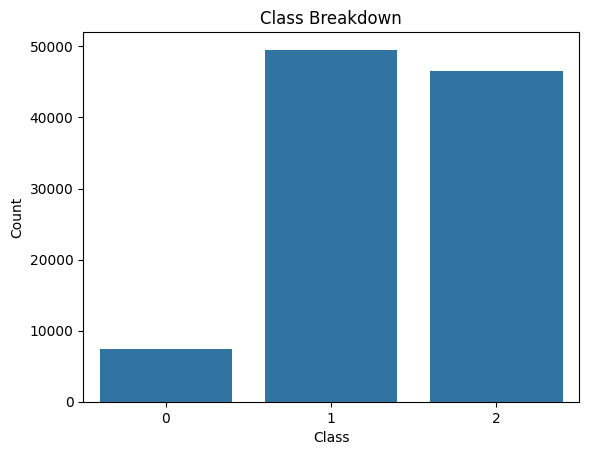

In [22]:
#Class Breakdown
# Count the number of occurrences of each loyalty level
Class_counts = df['Class'].value_counts()
print(Class_counts)

# Plot the satisfaction breakdown
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Class Breakdown')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [23]:
# # Histogram for Age
# df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

# # Histogram for Flight Distance
# df['Flight Distance'].hist(bins=20, color='lightgreen', edgecolor='black')
# plt.title('Flight Distance Distribution')
# plt.xlabel('Flight Distance')
# plt.ylabel('Frequency')
# plt.show()

# # Histogram for Arrival Delay in Minutes
# df['Arrival Delay in Minutes'].hist(bins=20, color='salmon', edgecolor='black')
# plt.title('Arrival Delay Distribution')
# plt.xlabel('Arrival Delay (minutes)')
# plt.ylabel('Frequency')
# plt.show()


In [24]:
# drop the unrelevant columns if they exist
if 'Unnamed: 0' in df.columns:
    df_clean = df.drop(columns=['Unnamed: 0'])
else:
    df_clean = df.copy()  # Create a copy to avoid modifying the original df

if 'id' in df_clean.columns:
    df_clean = df_clean.drop(columns=['id'])

In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# # 11 Service Quality Features vs satisfication
# # 1. Define your service columns + satisfaction
# service_features = [
#     'Inflight wifi service', 'Ease of Online booking', 'Gate location',
#     'Seat comfort', 'Inflight entertainment', 'Food and drink',
#     'Online boarding', 'Baggage handling', 'On-board service',
#     'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness'
# ]

# # 2. Slice & drop NaNs
# cols = service_features + ['satisfaction']
# df_clean = df[cols].dropna()

# # 3. Compute the full 14×14 correlation matrix
# service_corr_matrix = df_clean.corr()
# corr_sorted = service_corr_matrix['satisfaction'].sort_values(ascending=True) # Instead sort the 'satisfaction' column of the correlation matrix
# # Convert the Series to a DataFrame
# corr_sorted_df = corr_sorted.to_frame()
# mask_corr = np.triu(np.ones_like(corr_sorted_df, dtype=bool)) # Change this line to ensure the mask matches the new DataFrame

# # 4. Plot without masking (so you see every cell)
# plt.figure(figsize=(15, 12))
# sns.heatmap(
#     corr_sorted_df,
#     annot=True,
#     fmt='.2f',
#     cmap='coolwarm',
#     linewidths=0.5,
#     annot_kws={'size': 10},
#     cbar_kws={'label': 'Correlation'},
#     square=True,
#     mask=mask_corr
# )

# # 5. Tidy up and render
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=45, ha='right')
# plt.title('Correlation Heatmap: Service Features and Satisfaction')
# plt.tight_layout()
# plt.show()




# # 22. Demographic Features vs Satisfaction
# demographic_features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class']

# # Correlation heatmap for demographic features vs satisfaction
# demographic_corr_matrix = df[demographic_features + ['satisfaction']].corr()

# sns.heatmap(demographic_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap: Demographic Features and Satisfaction')
# plt.show()


# # 33.Operational Features vs Satisfaction
# operational_features = ['Flight Distance', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# # Correlation heatmap for operational features vs satisfaction
# operational_corr_matrix = df[operational_features + ['satisfaction']].corr()

# sns.heatmap(operational_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap: Service Features and Satisfaction')
# plt.show()



In [26]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. 计算每个服务特征与 satisfaction 的相关系数
# corr_with_sat = df_clean[service_features] \
#     .corrwith(df_clean['satisfaction']) \
#     .sort_values()

# # 2. 画横向条形图
# plt.figure(figsize=(8, 5))
# sns.barplot(
#     x=corr_with_sat.values,
#     y=corr_with_sat.index,
#     orient='h'
# )
# plt.xlabel('Correlation with Satisfaction (Pearson r)')
# plt.title('Which Service Features Drive Customer Satisfaction?')
# plt.xlim(0, corr_with_sat.max()*1.1)
# plt.tight_layout()
# plt.show()


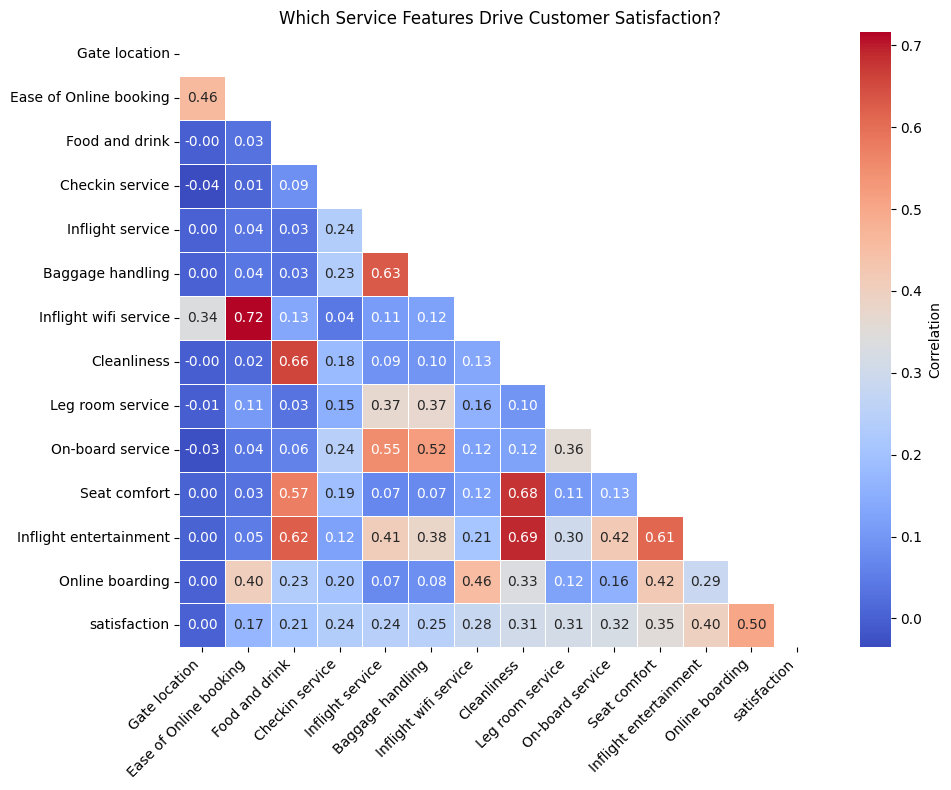

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 11 Service Quality Features vs satisfication
# 1. Define your service columns + satisfaction
service_features = [
    'Inflight wifi service', 'Ease of Online booking', 'Gate location',
    'Seat comfort', 'Inflight entertainment', 'Food and drink',
    'Online boarding', 'Baggage handling', 'On-board service',
    'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness'
]

# 1. 先算出完整的相关矩阵
corr = df_clean[service_features + ['satisfaction']].corr()

# 2. 按照 “与 satisfaction 的相关度” 排序（把 satisfaction 本身放最后）
feat_order = (
    corr['satisfaction']
    .drop('satisfaction')          # 去掉自己
    .sort_values(ascending=True)   # 升序：最不相关在前，最相关在后
    .index
    .tolist()
)
order = feat_order + ['satisfaction']

# 3. 重排行列
corr_sorted = corr.loc[order, order]

# 4. 只掩盖对角线（让上下三角都可见）
mask = np.triu(np.ones_like(corr_sorted, dtype=bool))

# 5. 画图
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_sorted,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  # 特征名称水平显示更易读
plt.title('Which Service Features Drive Customer Satisfaction?')
plt.tight_layout()
plt.show()


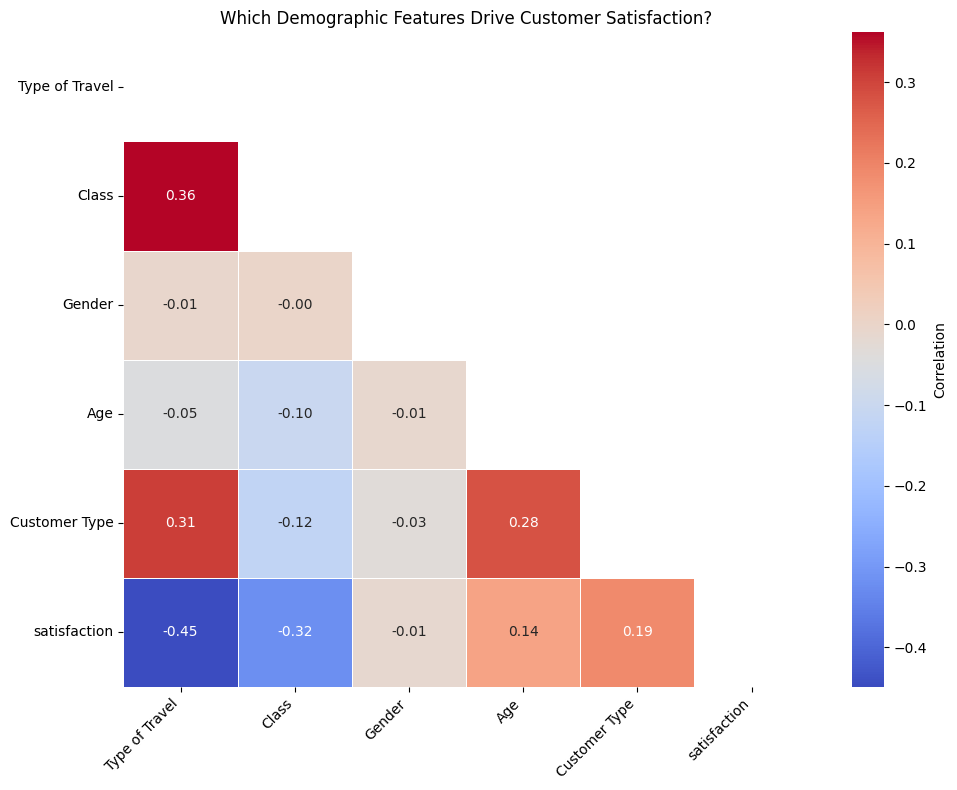

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 22. Demographic Features vs Satisfaction
demographic_features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class']

# 1. 先算出完整的相关矩阵
# Correlation heatmap for demographic features vs satisfaction
demographic_corr_matrix = df[demographic_features + ['satisfaction']].corr()

# 2. 按照 “与 satisfaction 的相关度” 排序（把 satisfaction 本身放最后）
feat_order = (
   demographic_corr_matrix['satisfaction'] # Use demographic_corr_matrix instead of demo_corr
    .drop('satisfaction')          # 去掉自己
    .sort_values(ascending=True)   # 升序：最不相关在前，最相关在后
    .index
    .tolist()
)
order = feat_order + ['satisfaction']

# 3. 重排行列
corr_sorted = demographic_corr_matrix.loc[order, order] # Use demographic_corr_matrix instead of corr

# 4. 只掩盖对角线（让上下三角都可见）
mask = np.triu(np.ones_like(corr_sorted, dtype=bool))

# 5. 画图
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_sorted,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  # 特征名称水平显示更易读
plt.title('Which Demographic Features Drive Customer Satisfaction?')
plt.tight_layout()
plt.show()



In [29]:
# prompt: print datatype of 'Flight Distance', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'

print(df['Flight Distance'].dtype)
print(df['Departure/Arrival time convenient'].dtype)
print(df['Departure Delay in Minutes'].dtype)
print(df['Arrival Delay in Minutes'].dtype)


int64
int64
int64
float64


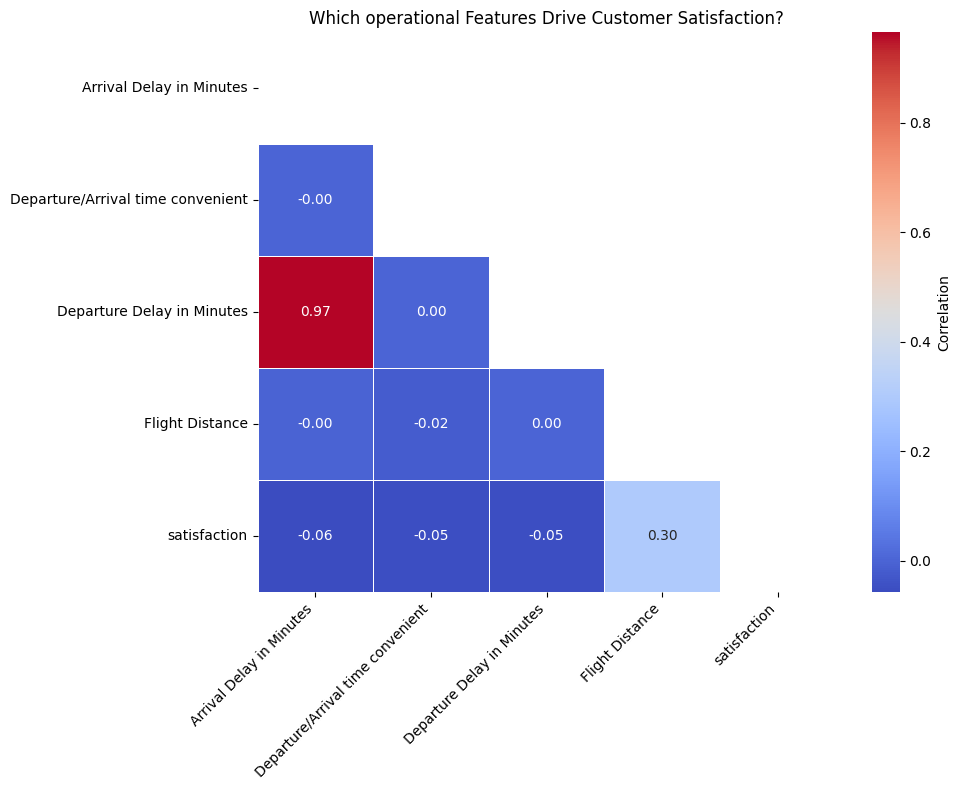

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 33.Operational Features vs Satisfaction
operational_features = ['Flight Distance', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# 1. 先算出完整的相关矩阵
# Correlation heatmap for demographic features vs satisfaction
operational_corr_matrix = df[operational_features + ['satisfaction']].corr()

# 2. 按照 “与 satisfaction 的相关度” 排序（把 satisfaction 本身放最后）
feat_order = (
   operational_corr_matrix['satisfaction'] # Use demographic_corr_matrix instead of demo_corr
    .drop('satisfaction')          # 去掉自己
    .sort_values(ascending=True)   # 升序：最不相关在前，最相关在后
    .index
    .tolist()
)
order = feat_order + ['satisfaction']

# 3. 重排行列
corr_sorted = operational_corr_matrix.loc[order, order] # Use operational_corr_matrix instead of operational__corr_matrix
# The previous line had a typo. It was using 'operational__corr_matrix' which was not defined.
# It should use 'operational_corr_matrix' instead.


# 4. 只掩盖对角线（让上下三角都可见）
mask = np.triu(np.ones_like(corr_sorted, dtype=bool))

# 5. 画图
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_sorted,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  # 特征名称水平显示更易读
plt.title('Which operational Features Drive Customer Satisfaction?')
plt.tight_layout()
plt.show()


In [31]:
import numpy as np

# 1. 定义三大类特征
demographic_features = ['Gender','Customer Type','Age','Type of Travel','Class']
service_features = [
    'Inflight wifi service','Ease of Online booking','Gate location',
    'Seat comfort','Inflight entertainment','Food and drink',
    'Online boarding','Baggage handling','On-board service',
    'Leg room service','Checkin service','Inflight service','Cleanliness'
]
operational_features = [
    'Flight Distance','Departure/Arrival time convenient',
    'Departure Delay in Minutes','Arrival Delay in Minutes'
]

# 2. 计算所有这些特征与 satisfaction 的相关系数
all_feats = demographic_features + service_features + operational_features
corr_with_sat = df_clean[all_feats].corrwith(df_clean['satisfaction']).abs()

# 3. 在 Service Quality 中选前 30%
n_svc = int(len(service_features) * 0.3)
top_service = (corr_with_sat[service_features]
               .sort_values(ascending=False)
               .head(n_svc)
               .index
               .tolist())

# 4. 在 Operational 中选前 30%
n_op = int(len(operational_features) * 0.3)
top_operational = (corr_with_sat[operational_features]
                   .sort_values(ascending=False)
                   .head(n_op)
                   .index
                   .tolist())

# 5. 最终聚类特征集
selected_features = demographic_features + top_service + top_operational
print("Selected features for clustering:", selected_features)


Selected features for clustering: ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Online boarding', 'Inflight entertainment', 'Seat comfort', 'Flight Distance']


In [32]:
# Create a list to store the correlation values
correlation_values = []

# Iterate through selected_features and extract correlations
for feature in selected_features:
    if feature in operational_corr_matrix.index:
        correlation_values.append(operational_corr_matrix.loc[feature, 'satisfaction'])
    elif feature in demographic_corr_matrix.index:
        correlation_values.append(demographic_corr_matrix.loc[feature, 'satisfaction'])
    elif feature in corr.index:
        correlation_values.append(corr.loc[feature, 'satisfaction'])
    else:
        correlation_values.append(np.nan)  # Handle cases where feature is not found

# Create the DataFrame
pd.DataFrame({
    'Feature': selected_features,
    'Correlation': correlation_values
}).to_csv("top_corr.csv", index=False)

In [33]:
import pandas as pd

# 1. Extract the 'satisfaction' column from each matrix, dropping the self-correlation
dem_ser  = demographic_corr_matrix['satisfaction'].drop('satisfaction')
svc_ser  =    corr['satisfaction'].drop('satisfaction')
op_ser   = operational_corr_matrix['satisfaction'].drop('satisfaction')

# 2. Put them into one DataFrame
export_df = pd.concat([dem_ser, svc_ser, op_ser], axis=0).reset_index()
export_df.columns = ['Feature', 'Correlation']

# 3. Tag by category
def categorize(f):
    if f in demographic_corr_matrix.index: return 'Demographic'
    if f in    corr.index:               return 'Service'
    if f in operational_corr_matrix.index:return 'Operational'
    return 'Other'

export_df['Category'] = export_df['Feature'].apply(categorize)

# 4. Export
export_df.to_csv('feature_correlations.csv', index=False)


In [34]:
# # Comparison of Satisfaction by Categorical Variables
# # Satisfaction by Gender
# sns.barplot(x='Gender', y='satisfaction', data=df)
# plt.title('Satisfaction by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Average Satisfaction')
# plt.show()

# # Satisfaction by Customer Type
# sns.barplot(x='Customer Type', y='satisfaction', data=df)
# plt.title('Satisfaction by Customer Type')
# plt.xlabel('Customer Type')
# plt.ylabel('Average Satisfaction')
# plt.show()

# # Satisfaction by Class
# sns.barplot(x='Class', y='satisfaction', data=df)
# plt.title('Satisfaction by Class')
# plt.xlabel('Class')
# plt.ylabel('Average Satisfaction')
# plt.show()


In [35]:
# #Visualizing Relationships Between Features
# # Scatter plot of Age vs. Flight Distance
# sns.scatterplot(x='Age', y='Flight Distance', data=df)
# plt.title('Age vs Flight Distance')
# plt.xlabel('Age')
# plt.ylabel('Flight Distance')
# plt.show()

# # Pairplot of key features to check relationships
# sns.pairplot(df[['Age', 'Flight Distance', 'Arrival Delay in Minutes', 'satisfaction']])
# plt.show()


In [36]:
# #Boxplots for Feature Distribution by Category
# # Boxplot of Flight Distance by Class
# sns.boxplot(x='Class', y='Flight Distance', data=df)
# plt.title('Flight Distance by Class')
# plt.show()

# # Boxplot of Arrival Delay by Satisfaction
# sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df)
# plt.title('Arrival Delay by Satisfaction')
# plt.show()


**Cluster**

Summary of Clusters:
Cluster 0:

Satisfaction: High (0.67)

Service Scores: Moderate (especially for Seat comfort and Inflight wifi service)

Class: Mostly Business Class and Eco Plus passengers

Age: Younger (average age 38.31)

Gender: Slightly more Female passengers

Cluster 1:

Satisfaction: Low (0.28)

Service Scores: High, especially for Seat comfort and Inflight entertainment

Class: Primarily Business Class with few Eco Plus or Economy passengers

Age: Older passengers (average age 42.86)

Gender: Balanced distribution of Male and Female

Cluster 2:

Satisfaction: Moderate (0.46)

Service Scores: Moderate, with relatively high scores for Seat comfort

Class: More balanced across Business Class, Eco Plus, and Economy

Age: Middle-aged passengers (average age 40.10)

Gender: Balanced, slightly more Females

Personal Profile Descriptions for Clusters:
Cluster 0: "Younger passengers, predominantly Female, with high satisfaction levels. Mostly Business Class and Eco Plus travelers who are moderately satisfied with services."

Cluster 1: "Older passengers, balanced in Male and Female, with lower satisfaction. Mostly Business Class with high ratings for Seat comfort but overall low satisfaction."

Cluster 2: "Middle-aged passengers with moderate satisfaction. More balanced in class preferences, including Business, Eco Plus, and Economy. Slightly more Female passengers."

重新做的clustering，选择影响最大的feature来做的

In [37]:
selected_features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Online boarding', 'Inflight entertainment', 'Seat comfort', 'Flight Distance']

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. 取子集并去 NaN
# Instead of using df_clean, use the original DataFrame 'df'
df_cluster = df[selected_features].dropna()

# 2. 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 3. 选簇数：这里先试 2~6 个，计算 Silhouette Score
best_k = 2
best_score = -1
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette={score:.3f}")
    if score > best_score:
        best_score, best_k = score, k

print(f"\n最佳簇数选为 k={best_k}（silhouette={best_score:.3f}）")

# 4. 用最佳 k 做最终聚类
kmeans = KMeans(n_clusters=best_k, random_state=42)
# Instead of using df_clean, use the original DataFrame 'df'
df['cluster_label'] = kmeans.fit_predict(scaler.transform(df[selected_features]))

# 5. 查看每个簇的规模
print("\n各簇样本数量：")
print(df['cluster_label'].value_counts().sort_index())

# 6. （可选）查看各簇中心在原始尺度下的均值
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profile = pd.DataFrame(centers, columns=selected_features)
cluster_profile.index.name = 'cluster_label'
print("\n各簇特征均值：")
print(cluster_profile)





k = 2, silhouette = 0.186
k = 3, silhouette = 0.233
k = 4, silhouette = 0.203
k = 5, silhouette = 0.174
k = 6, silhouette = 0.171
best k = 3 （silhouette = 0.233）


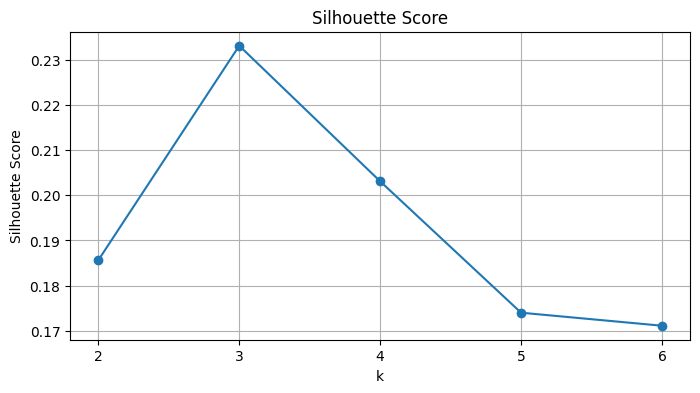

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. 取子集并去 NaN
df_cluster = df[selected_features].dropna()

# 2. 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 3. 选簇数：先试 2~6 个，计算 Silhouette Score 并保存
scores = []
ks = range(2, 7)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    print(f"k = {k}, silhouette = {score:.3f}")

# 找出最佳 k
best_score = max(scores)
best_k = ks[scores.index(best_score)]
print(f"best k = {best_k} （silhouette = {best_score:.3f}）")

# 4. 绘制 Silhouette Score 折线图
plt.figure(figsize=(8, 4))
plt.plot(list(ks), scores, marker='o')
plt.xticks(list(ks))
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.show()


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# 1. 准备特征子集并去除缺失
# 假设你已经有了 selected_features 列表
df_cluster = df[selected_features].dropna()

# 2. 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 3. 最终聚类：固定 k=3
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 4. 将聚类标签写回原始 DataFrame
# 注意对齐索引
df.loc[df_cluster.index, 'cluster_label'] = labels

# 5. 查看每个簇的样本量
print("各簇样本数量：")
print(df['cluster_label'].value_counts().sort_index())

# 6. 可选：查看每个簇中心在原始尺度下的均值（轮廓画像）
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profile = pd.DataFrame(centers, columns=selected_features)
cluster_profile.index.name = 'cluster_label'
print("\n各簇特征均值（画像示例）：")
print(cluster_profile)

# 7. 导出带 cluster_label 的完整表格到 CSV
df.to_csv("survey_with_clusters.csv", index=False)


各簇样本数量：
cluster_label
0.0    18803
1.0    47119
2.0    37672
Name: count, dtype: int64

各簇特征均值（画像示例）：
                 Gender  Customer Type        Age  Type of Travel     Class  \
cluster_label                                                                 
0              0.541161   9.425793e-14  30.237981        0.007179  1.540257   
1              0.498485   9.978806e-01  43.867473        0.046521  0.993663   
2              0.502034   9.992555e-01  38.322280        0.792379  1.778180   

               Online boarding  Inflight entertainment  Seat comfort  \
cluster_label                                                          
0                     2.701766                3.040257      2.984844   
1                     3.985185                3.889028      4.028294   
2                     2.603106                2.851570      2.928843   

               Flight Distance  
cluster_label                   
0                   708.508243  
1                  1708.512218  
2        

In [40]:
cluster_sat = df.groupby('cluster_label')['satisfaction'].mean()
print(cluster_sat)


cluster_label
0.0    0.235867
1.0    0.757083
2.0    0.127124
Name: satisfaction, dtype: float64
